In [1]:
# brew install aubio --with-python

# THIS WAS JUST A TEST: 
# get the pitch and send it into song.tsv
# aubiopitch -i 01\ -\ Hip\ Straights.mp3 > song.tsv

# I'M USING THIS CODE TO GET THE TSV PITCH DATA FROM THE COMMAND LINE WITH AUBIO:
# aubiopitch -i bohemian_rhapsody.mp3 --pitch-tolerance 0.5 -B 16384 -H 8192 --pitch-tolerance 0.5 > songtest.csv



In [3]:
import pandas as pd
%matplotlib inline

In [4]:
# https://www.johndcook.com/blog/2016/02/10/musical-pitch-notation/

from math import log2, pow

A4 = 440
C0 = A4*pow(2, -4.75)
name = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    
def pitch(freq):
    try:
        h = round(12*log2(freq/C0))
        octave = h // 12
        n = h % 12
        return name[n] + str(octave)
    except:
        return None

# Test 

In [97]:
df = pd.read_csv("song.tsv", sep=' ', header=None, names=['time', 'pitch'])
df.head()

,time,pitch
0,0.00000,0.0
1,0.02322,0.0
2,0.04644,0.0
3,0.06966,0.0
4,0.09288,0.0


In [98]:
df.shape

(8337, 2)

In [102]:
df['second'] = df.time.astype(int)
grouped = df.groupby('second').pitch.mean().to_frame()
grouped.head()

,pitch
second,
0,55.025268
1,190.538668
2,216.810328
3,251.299832
4,256.862513


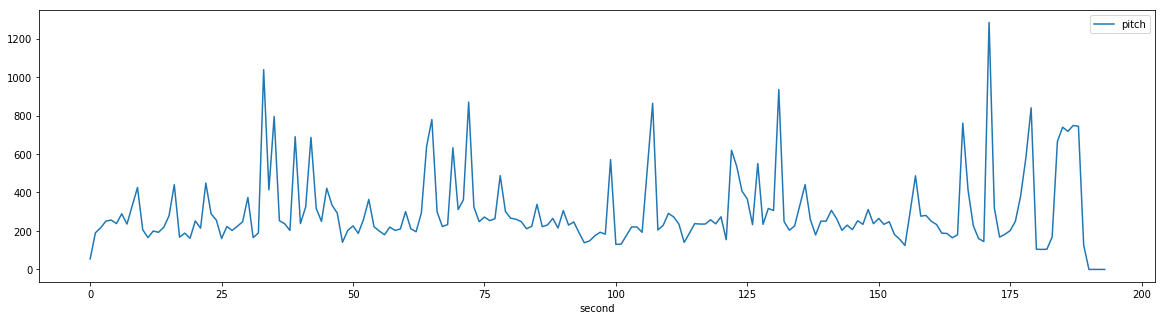

In [103]:
grouped.plot(figsize=(20,5))

In [90]:
grouped['note'] = grouped.pitch.apply(lambda x: pitch(x))
grouped.head()

,pitch,note
second,,
0,55.025268,A1
1,190.538668,G3
2,216.810328,A3
3,251.299832,B3
4,256.862513,C4


In [91]:
grouped.shape

(194, 2)

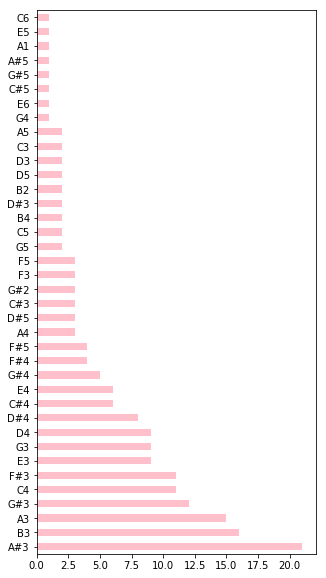

In [92]:
grouped.note.value_counts().plot(kind='barh', figsize=(5,10), color='pink')

# Bohemian Rhapsody

In [14]:
df_1 = pd.read_csv("bohemian-rhapsody.tsv", sep=' ', header=None, names=['time', 'pitch'])
df_1.head()

,time,pitch
0,0.000000,0.0
1,0.185760,0.0
2,0.371519,0.0
3,0.557279,0.0
4,0.743039,0.0


In [15]:
df_1['second'] = df_1.time.astype(int)
grouped_1 = df_1.groupby('second').pitch.mean().to_frame()
grouped_1.head()

,pitch
second,
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


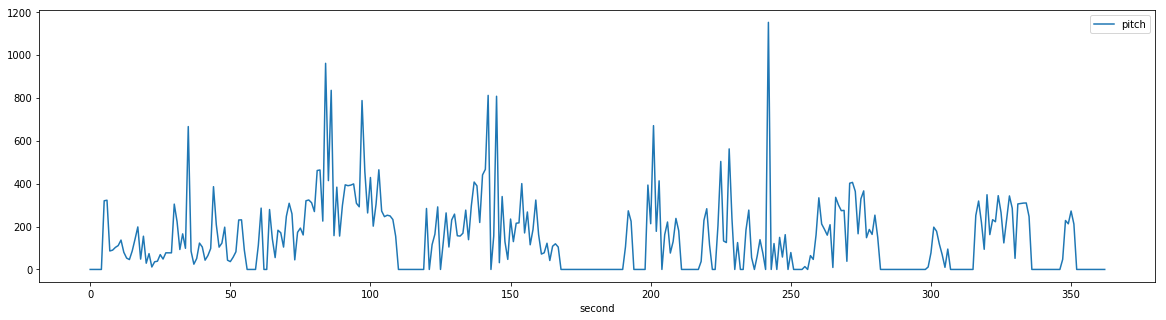

In [16]:
grouped_1.plot(figsize=(20,5))

In [17]:
grouped_1['note'] = grouped_1.pitch.apply(lambda x: pitch(x))
grouped_1.head(40)

,pitch,note
second,,
0,0.000000,None
1,0.000000,None
2,0.000000,None
3,0.000000,None
4,0.000000,None
5,319.961588,D#4
6,322.508701,E4
7,86.107121,F2
8,89.890094,F#2


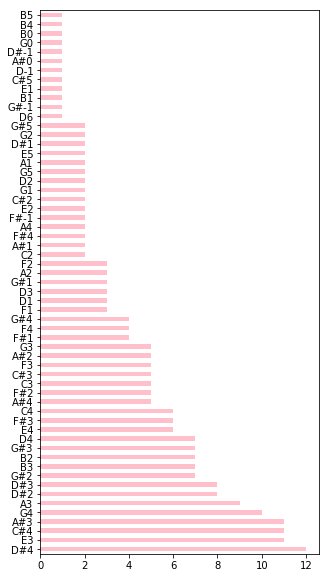

In [18]:
grouped_1.note.value_counts().plot(kind='barh', figsize=(5,10), color='pink')

In [19]:
grouped_1['scale'] = grouped_1['note'].apply({
    'None': 0, 
    'C0': 1, 'C1': 1, 'C2': 1,'C3': 1, 'C4': 1, 'C5': 1, 'C6': 1,
    'C#0': 2, 'C#1': 2, 'C#2': 2, 'C#3': 2, 'C#4': 2, 'C#5': 2, 'C#6': 2,
    'D0': 3, 'D1':3, 'D2':3, 'D3':3, 'D4':3, 'D5':3, 'D6':3, 
    'D#0':4, 'D#1':4, 'D#2':4, 'D#3':4, 'D#5':4, 'D#4':4, 'D#6':4,'D#-1':4,
    'E0': 5, 'E1': 5, 'E2': 5, 'E3': 5, 'E4': 5, 'E5': 5, 'E6': 5,
    'F0': 6, 'F1': 6, 'F2': 6, 'F3': 6, 'F4': 6, 'F5': 6, 'F6': 6, 'F#-1':6,
    'F#0': 7, 'F#1': 7, 'F#2': 7, 'F#3': 7, 'F#4': 7, 'F#5': 7, 'F#6': 7,
    'G0':8, 'G1':8, 'G2':8, 'G3':8, 'G4':8, 'G5':8, 'G6':8,
    'G#0':9, 'G#1':9, 'G#-1':9, 'G#2':9, 'G#3':9, 'G#4':9, 'G#5':9, 'G#6':9, 'G#-1': 9,
    'A0': 10, 'A1': 10, 'A2': 10, 'A3': 10, 'A4': 10, 'A5': 10, 'A6': 10,
    'A#0':11, 'A#1':11, 'A#2':11, 'A#3':11, 'A#4':11, 'A#5':11, 'A#6':11,
    'B0': 12, 'B1': 12, 'B2': 12, 'B3': 12, 'B4': 12, 'B5': 12, 'B6': 12,}.get)


In [20]:
grouped_1.head(50)

,pitch,note,scale
second,,,
0,0.000000,None,NaN
1,0.000000,None,NaN
2,0.000000,None,NaN
3,0.000000,None,NaN
4,0.000000,None,NaN
5,319.961588,D#4,4.0
6,322.508701,E4,5.0
7,86.107121,F2,6.0
8,89.890094,F#2,7.0


In [21]:
grouped_1.note.value_counts()

D#4     12
E3      11
C#4     11
A#3     11
G4      10
A3       9
D#2      8
D#3      8
G#2      7
B3       7
B2       7
G#3      7
D4       7
E4       6
F#3      6
C4       6
A#4      5
F#2      5
C3       5
C#3      5
F3       5
A#2      5
G3       5
F#1      4
F4       4
G#4      4
F1       3
D1       3
D3       3
G#1      3
A2       3
F2       3
C2       2
A#1      2
F#4      2
A4       2
F#-1     2
E2       2
C#2      2
G1       2
D2       2
G5       2
A1       2
E5       2
D#1      2
G2       2
G#5      2
D6       1
G#-1     1
B1       1
E1       1
C#5      1
D-1      1
A#0      1
D#-1     1
G0       1
B0       1
B4       1
B5       1
Name: note, dtype: int64

In [22]:
grouped_1.fillna(0, inplace=True)

In [23]:
grouped_1['song_name'] = 'Bohemian Rhapsody'
grouped_1.head()

,pitch,note,scale,song_name
second,,,,
0,0.0,0,0.0,Bohemian Rhapsody
1,0.0,0,0.0,Bohemian Rhapsody
2,0.0,0,0.0,Bohemian Rhapsody
3,0.0,0,0.0,Bohemian Rhapsody
4,0.0,0,0.0,Bohemian Rhapsody


In [24]:
grouped_1.head(40)

,pitch,note,scale,song_name
second,,,,
0,0.000000,0,0.0,Bohemian Rhapsody
1,0.000000,0,0.0,Bohemian Rhapsody
2,0.000000,0,0.0,Bohemian Rhapsody
3,0.000000,0,0.0,Bohemian Rhapsody
4,0.000000,0,0.0,Bohemian Rhapsody
5,319.961588,D#4,4.0,Bohemian Rhapsody
6,322.508701,E4,5.0,Bohemian Rhapsody
7,86.107121,F2,6.0,Bohemian Rhapsody
8,89.890094,F#2,7.0,Bohemian Rhapsody


In [26]:
df_test = pd.read_csv('bohemian-notes.csv')
df_test.head()

,second,pitch,note,scale
0,0,0.0,0,0.0
1,1,0.0,0,0.0
2,2,0.0,0,0.0
3,3,0.0,0,0.0
4,4,0.0,0,0.0


In [36]:
grouped_test_plot = df_test.groupby('second').scale.median().to_frame()
grouped_test_plot.head()

,scale
second,
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


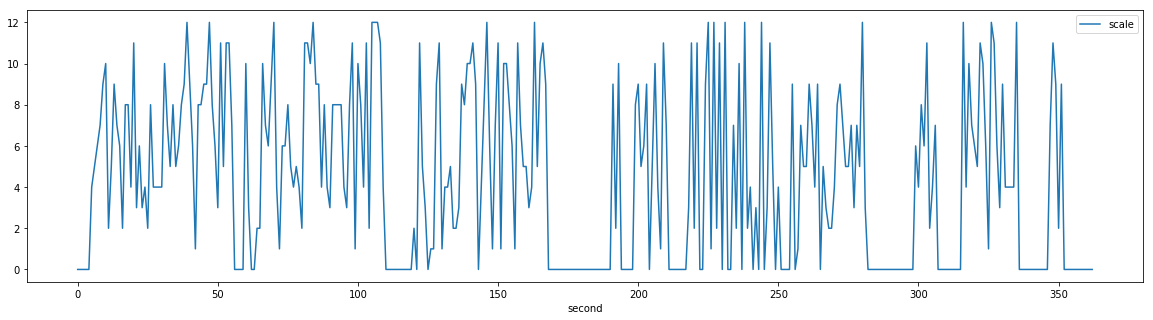

In [34]:
grouped_test_plot.plot(figsize=(20,5))

In [385]:
grouped_1.to_csv('bohemian-notes.csv')

# Somebody to Love

In [386]:
df_2 = pd.read_csv("somebody-to-love.tsv", sep=' ', header=None, names=['time', 'pitch'])
df_2.head()

,time,pitch
0,0.00000,0.0
1,0.18576,0.0
2,0.37152,0.0
3,0.55728,0.0
4,0.74304,0.0


In [387]:
df_2['second'] = df_2.time.astype(int)
grouped_2 = df_2.groupby('second').pitch.mean().to_frame()
grouped_2.head()

,pitch
second,
0,0.00000
1,64.65173
2,394.91576
3,81.73792
4,0.00000


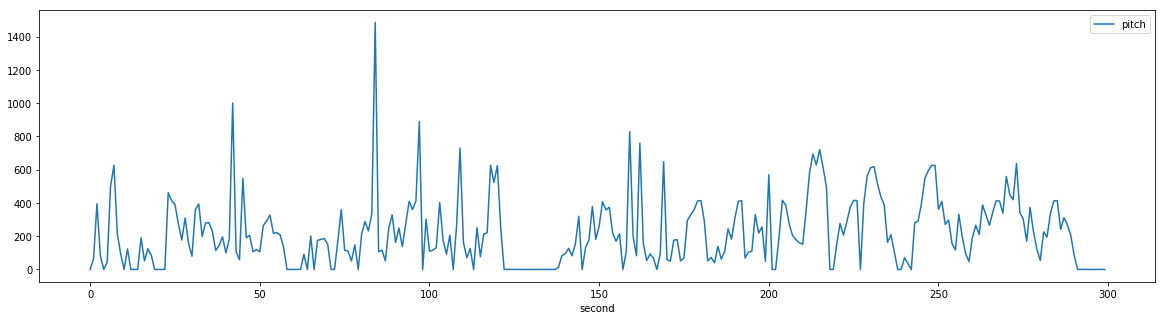

In [388]:
grouped_2.plot(figsize=(20,5))

In [389]:
grouped_2.shape

(300, 1)

In [390]:
grouped_2['note'] = grouped_2.pitch.apply(lambda x: pitch(x))
grouped_2.head(40)

,pitch,note
second,,
0,0.00000,None
1,64.65173,C2
2,394.91576,G4
3,81.73792,E2
4,0.00000,None
5,43.14576,F1
6,497.42021,B4
7,626.79226,D#5
8,213.30159,G#3


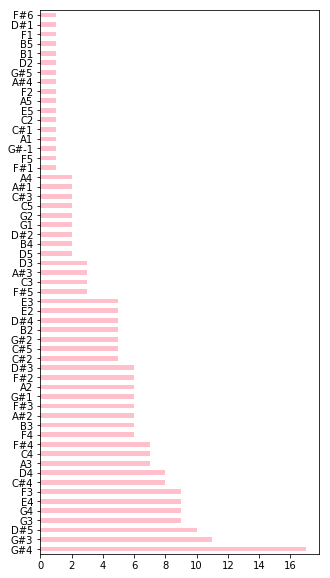

In [243]:
grouped_2.note.value_counts().plot(kind='barh', figsize=(5,10), color='pink')

In [391]:
grouped_2['scale'] = grouped_2['note'].apply({
    'None': 0, 
    'C0': 1, 'C1': 1, 'C2': 1,'C3': 1, 'C4': 1, 'C5': 1, 'C6': 1,
    'C#0': 2, 'C#1': 2, 'C#2': 2, 'C#3': 2, 'C#4': 2, 'C#5': 2, 'C#6': 2,
    'D0': 3, 'D1':3, 'D2':3, 'D3':3, 'D4':3, 'D5':3, 'D6':3, 
    'D#0':4, 'D#1':4, 'D#2':4, 'D#3':4, 'D#5':4, 'D#4':4, 'D#6':4,'D#-1':4,
    'E0': 5, 'E1': 5, 'E2': 5, 'E3': 5, 'E4': 5, 'E5': 5, 'E6': 5,
    'F0': 6, 'F1': 6, 'F2': 6, 'F3': 6, 'F4': 6, 'F5': 6, 'F6': 6, 'F#-1':6,
    'F#0': 7, 'F#1': 7, 'F#2': 7, 'F#3': 7, 'F#4': 7, 'F#5': 7, 'F#6': 7,
    'G0':8, 'G1':8, 'G2':8, 'G3':8, 'G4':8, 'G5':8, 'G6':8,
    'G#0':9, 'G#1':9, 'G#-1':9, 'G#2':9, 'G#3':9, 'G#4':9, 'G#5':9, 'G#6':9, 'G#-1': 9,
    'A0': 10, 'A1': 10, 'A2': 10, 'A3': 10, 'A4': 10, 'A5': 10, 'A6': 10,
    'A#0':11, 'A#1':11, 'A#2':11, 'A#3':11, 'A#4':11, 'A#5':11, 'A#6':11,
    'B0': 12, 'B1': 12, 'B2': 12, 'B3': 12, 'B4': 12, 'B5': 12, 'B6': 12,}.get)

In [392]:
grouped_2.head(30)

,pitch,note,scale
second,,,
0,0.00000,None,NaN
1,64.65173,C2,1.0
2,394.91576,G4,8.0
3,81.73792,E2,5.0
4,0.00000,None,NaN
5,43.14576,F1,6.0
6,497.42021,B4,12.0
7,626.79226,D#5,4.0
8,213.30159,G#3,9.0


In [393]:
grouped_2.fillna(0, inplace=True)

In [394]:
grouped_2.head()

,pitch,note,scale
second,,,
0,0.00000,0,0.0
1,64.65173,C2,1.0
2,394.91576,G4,8.0
3,81.73792,E2,5.0
4,0.00000,0,0.0


In [525]:
grouped_2['song_name'] = 'Somebody To Love'
grouped_2.head()

,pitch,note,scale,song_name
second,,,,
0,0.00000,0,0.0,Somebody To Love
1,64.65173,C2,1.0,Somebody To Love
2,394.91576,G4,8.0,Somebody To Love
3,81.73792,E2,5.0,Somebody To Love
4,0.00000,0,0.0,Somebody To Love


In [395]:
grouped_2.to_csv('somebody-to-love-notes.csv')

# Under Pressure

In [396]:
df_3 = pd.read_csv("under-pressure.tsv", sep=' ', header=None, names=['time', 'pitch'])
df_3.head()

,time,pitch
0,0.00000,0.00000
1,0.18576,0.00000
2,0.37152,244.21205
3,0.55728,222.92985
4,0.74304,222.65790


In [397]:
df_3['second'] = df_3.time.astype(int)
grouped_3 = df_3.groupby('second').pitch.mean().to_frame()
grouped_3.head()

,pitch
second,
0,149.18483
1,113.48873
2,104.06001
3,237.09309
4,82.49315


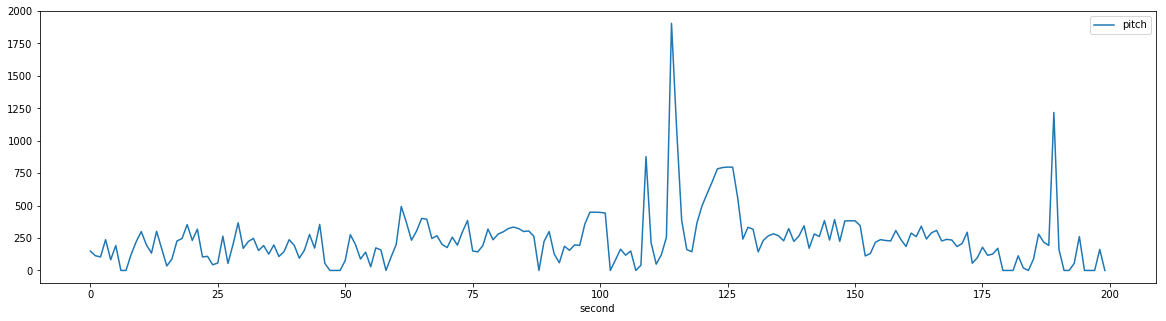

In [398]:
grouped_3.plot(figsize=(20,5))

In [399]:
grouped_3.shape

(200, 1)

In [400]:
grouped_3['note'] = grouped_3.pitch.apply(lambda x: pitch(x))
grouped_3.head(40)

,pitch,note
second,,
0,149.18483,D3
1,113.48873,A#2
2,104.06001,G#2
3,237.09309,A#3
4,82.49315,E2
5,191.96579,G3
6,0.00000,None
7,0.00000,None
8,122.47142,B2


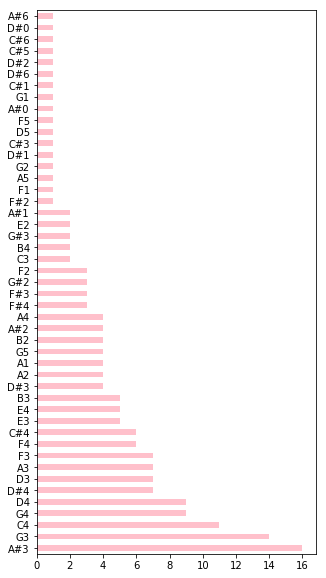

In [401]:
grouped_3.note.value_counts().plot(kind='barh', figsize=(5,10), color='pink')

In [402]:
grouped_3['scale'] = grouped_3['note'].apply({
    'None': 0, 
    'C0': 1, 'C1': 1, 'C2': 1,'C3': 1, 'C4': 1, 'C5': 1, 'C6': 1,
    'C#0': 2, 'C#1': 2, 'C#2': 2, 'C#3': 2, 'C#4': 2, 'C#5': 2, 'C#6': 2,
    'D0': 3, 'D1':3, 'D2':3, 'D3':3, 'D4':3, 'D5':3, 'D6':3, 
    'D#0':4, 'D#1':4, 'D#2':4, 'D#3':4, 'D#5':4, 'D#4':4, 'D#6':4,'D#-1':4,
    'E0': 5, 'E1': 5, 'E2': 5, 'E3': 5, 'E4': 5, 'E5': 5, 'E6': 5,
    'F0': 6, 'F1': 6, 'F2': 6, 'F3': 6, 'F4': 6, 'F5': 6, 'F6': 6, 'F#-1':6,
    'F#0': 7, 'F#1': 7, 'F#2': 7, 'F#3': 7, 'F#4': 7, 'F#5': 7, 'F#6': 7,
    'G0':8, 'G1':8, 'G2':8, 'G3':8, 'G4':8, 'G5':8, 'G6':8,
    'G#0':9, 'G#1':9, 'G#-1':9, 'G#2':9, 'G#3':9, 'G#4':9, 'G#5':9, 'G#6':9, 'G#-1': 9,
    'A0': 10, 'A1': 10, 'A2': 10, 'A3': 10, 'A4': 10, 'A5': 10, 'A6': 10,
    'A#0':11, 'A#1':11, 'A#2':11, 'A#3':11, 'A#4':11, 'A#5':11, 'A#6':11,
    'B0': 12, 'B1': 12, 'B2': 12, 'B3': 12, 'B4': 12, 'B5': 12, 'B6': 12,}.get)

In [403]:
grouped_3.head(30)

,pitch,note,scale
second,,,
0,149.18483,D3,3.0
1,113.48873,A#2,11.0
2,104.06001,G#2,9.0
3,237.09309,A#3,11.0
4,82.49315,E2,5.0
5,191.96579,G3,8.0
6,0.00000,None,NaN
7,0.00000,None,NaN
8,122.47142,B2,12.0


In [404]:
grouped_3.fillna(0, inplace=True)

In [405]:
grouped_3.head()

,pitch,note,scale
second,,,
0,149.18483,D3,3.0
1,113.48873,A#2,11.0
2,104.06001,G#2,9.0
3,237.09309,A#3,11.0
4,82.49315,E2,5.0


In [524]:
grouped_3['song_name'] = 'Under Pressure'
grouped_3.head()

,pitch,note,scale,song_name
second,,,,
0,149.18483,D3,3.0,Under Pressure
1,113.48873,A#2,11.0,Under Pressure
2,104.06001,G#2,9.0,Under Pressure
3,237.09309,A#3,11.0,Under Pressure
4,82.49315,E2,5.0,Under Pressure


In [406]:
grouped_3.to_csv('under-pressure-notes.csv')

# Another one bites the dust

In [407]:
df_4 = pd.read_csv("another-one-bites-the-dust.tsv", sep=' ', header=None, names=['time', 'pitch'])
df_4.head()

,time,pitch
0,0.00000,0.0
1,0.18576,0.0
2,0.37152,0.0
3,0.55728,0.0
4,0.74304,0.0


In [408]:
df_4['second'] = df_4.time.astype(int)
grouped_4 = df_4.groupby('second').pitch.mean().to_frame()
grouped_4.head()

,pitch
second,
0,0.00000
1,66.70302
2,76.33793
3,0.00000
4,68.95081


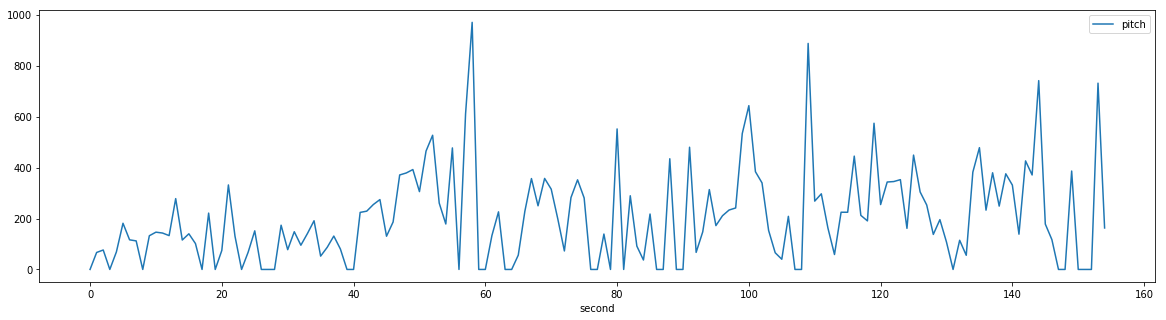

In [409]:
grouped_4.plot(figsize=(20,5))


In [410]:
grouped_4.shape

(155, 1)

In [411]:
grouped_4['note'] = grouped_4.pitch.apply(lambda x: pitch(x))
grouped_4.head(40)

,pitch,note
second,,
0,0.00000,None
1,66.70302,C2
2,76.33793,D#2
3,0.00000,None
4,68.95081,C#2
5,181.34671,F#3
6,116.28135,A#2
7,112.08159,A2
8,0.00000,None


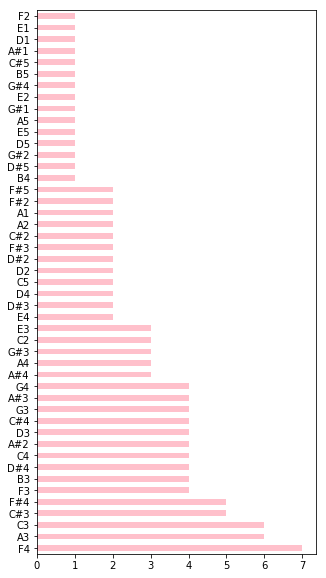

In [412]:
grouped_4.note.value_counts().plot(kind='barh', figsize=(5,10), color='pink')


In [413]:
grouped_4['scale'] = grouped_4['note'].apply({
    'None': 0, 
    'C0': 1, 'C1': 1, 'C2': 1,'C3': 1, 'C4': 1, 'C5': 1, 'C6': 1,
    'C#0': 2, 'C#1': 2, 'C#2': 2, 'C#3': 2, 'C#4': 2, 'C#5': 2, 'C#6': 2,
    'D0': 3, 'D1':3, 'D2':3, 'D3':3, 'D4':3, 'D5':3, 'D6':3, 
    'D#0':4, 'D#1':4, 'D#2':4, 'D#3':4, 'D#5':4, 'D#4':4, 'D#6':4,'D#-1':4,
    'E0': 5, 'E1': 5, 'E2': 5, 'E3': 5, 'E4': 5, 'E5': 5, 'E6': 5,
    'F0': 6, 'F1': 6, 'F2': 6, 'F3': 6, 'F4': 6, 'F5': 6, 'F6': 6, 'F#-1':6,
    'F#0': 7, 'F#1': 7, 'F#2': 7, 'F#3': 7, 'F#4': 7, 'F#5': 7, 'F#6': 7,
    'G0':8, 'G1':8, 'G2':8, 'G3':8, 'G4':8, 'G5':8, 'G6':8,
    'G#0':9, 'G#1':9, 'G#-1':9, 'G#2':9, 'G#3':9, 'G#4':9, 'G#5':9, 'G#6':9, 'G#-1': 9,
    'A0': 10, 'A1': 10, 'A2': 10, 'A3': 10, 'A4': 10, 'A5': 10, 'A6': 10,
    'A#0':11, 'A#1':11, 'A#2':11, 'A#3':11, 'A#4':11, 'A#5':11, 'A#6':11,
    'B0': 12, 'B1': 12, 'B2': 12, 'B3': 12, 'B4': 12, 'B5': 12, 'B6': 12,}.get)

In [414]:
grouped_4.head(30)

,pitch,note,scale
second,,,
0,0.00000,None,NaN
1,66.70302,C2,1.0
2,76.33793,D#2,4.0
3,0.00000,None,NaN
4,68.95081,C#2,2.0
5,181.34671,F#3,7.0
6,116.28135,A#2,11.0
7,112.08159,A2,10.0
8,0.00000,None,NaN


In [415]:
grouped_4.fillna(0, inplace=True)

In [416]:
grouped_4.head()

,pitch,note,scale
second,,,
0,0.00000,0,0.0
1,66.70302,C2,1.0
2,76.33793,D#2,4.0
3,0.00000,0,0.0
4,68.95081,C#2,2.0


In [523]:
grouped_4['song_name'] = 'Another One Bites The Dust'
grouped_4.head()

,pitch,note,scale,song_name
second,,,,
0,0.00000,0,0.0,Another One Bites The Dust
1,66.70302,C2,1.0,Another One Bites The Dust
2,76.33793,D#2,4.0,Another One Bites The Dust
3,0.00000,0,0.0,Another One Bites The Dust
4,68.95081,C#2,2.0,Another One Bites The Dust


In [417]:
grouped_4.to_csv('another-one-notes.csv')

# Crazy little thing called love

In [418]:
df_5 = pd.read_csv("crazy-little-thing-called-love.tsv", sep=' ', header=None, names=['time', 'pitch'])
df_5.head()

,time,pitch
0,0.00000,0.0
1,0.18576,0.0
2,0.37152,0.0
3,0.55728,0.0
4,0.74304,0.0


In [419]:
df_5['second'] = df_5.time.astype(int)
grouped_5 = df_5.groupby('second').pitch.mean().to_frame()
grouped_5.head()

,pitch
second,
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


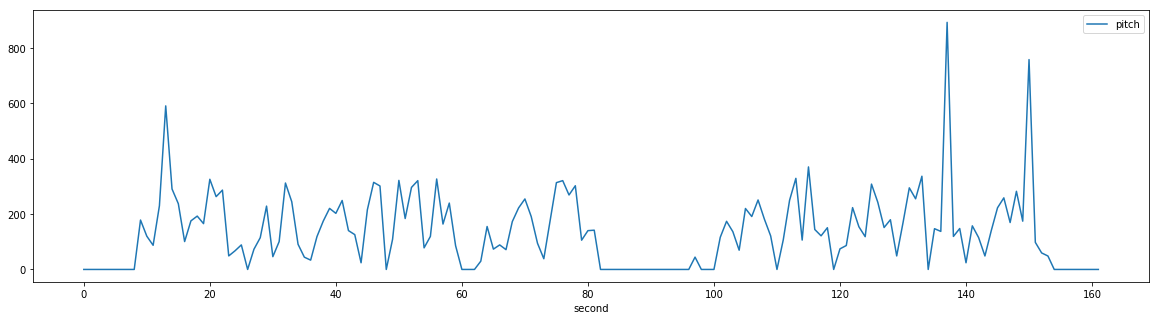

In [420]:
grouped_5.plot(figsize=(20,5))

In [421]:
grouped_5.shape

(162, 1)

In [422]:
grouped_5['note'] = grouped_5.pitch.apply(lambda x: pitch(x))
grouped_5.head(40)

,pitch,note
second,,
0,0.00000,None
1,0.00000,None
2,0.00000,None
3,0.00000,None
4,0.00000,None
5,0.00000,None
6,0.00000,None
7,0.00000,None
8,0.00000,None


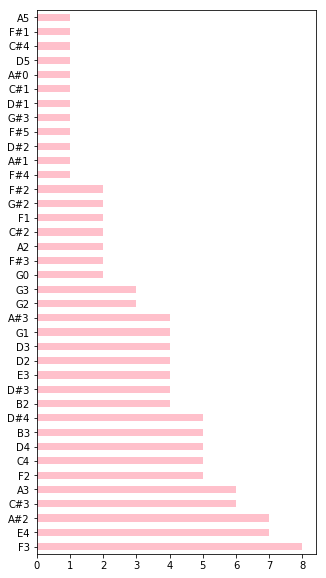

In [423]:
grouped_5.note.value_counts().plot(kind='barh', figsize=(5,10), color='pink')

In [424]:
grouped_5['scale'] = grouped_5['note'].apply({
    'None': 0, 
    'C0': 1, 'C1': 1, 'C2': 1,'C3': 1, 'C4': 1, 'C5': 1, 'C6': 1,
    'C#0': 2, 'C#1': 2, 'C#2': 2, 'C#3': 2, 'C#4': 2, 'C#5': 2, 'C#6': 2,
    'D0': 3, 'D1':3, 'D2':3, 'D3':3, 'D4':3, 'D5':3, 'D6':3, 
    'D#0':4, 'D#1':4, 'D#2':4, 'D#3':4, 'D#5':4, 'D#4':4, 'D#6':4,'D#-1':4,
    'E0': 5, 'E1': 5, 'E2': 5, 'E3': 5, 'E4': 5, 'E5': 5, 'E6': 5,
    'F0': 6, 'F1': 6, 'F2': 6, 'F3': 6, 'F4': 6, 'F5': 6, 'F6': 6, 'F#-1':6,
    'F#0': 7, 'F#1': 7, 'F#2': 7, 'F#3': 7, 'F#4': 7, 'F#5': 7, 'F#6': 7,
    'G0':8, 'G1':8, 'G2':8, 'G3':8, 'G4':8, 'G5':8, 'G6':8,
    'G#0':9, 'G#1':9, 'G#-1':9, 'G#2':9, 'G#3':9, 'G#4':9, 'G#5':9, 'G#6':9, 'G#-1': 9,
    'A0': 10, 'A1': 10, 'A2': 10, 'A3': 10, 'A4': 10, 'A5': 10, 'A6': 10,
    'A#0':11, 'A#1':11, 'A#2':11, 'A#3':11, 'A#4':11, 'A#5':11, 'A#6':11,
    'B0': 12, 'B1': 12, 'B2': 12, 'B3': 12, 'B4': 12, 'B5': 12, 'B6': 12,}.get)

In [425]:
grouped_5.head(30)

,pitch,note,scale
second,,,
0,0.00000,None,NaN
1,0.00000,None,NaN
2,0.00000,None,NaN
3,0.00000,None,NaN
4,0.00000,None,NaN
5,0.00000,None,NaN
6,0.00000,None,NaN
7,0.00000,None,NaN
8,0.00000,None,NaN


In [426]:
grouped_5.fillna(0, inplace=True)
grouped_5.head()

,pitch,note,scale
second,,,
0,0.0,0,0.0
1,0.0,0,0.0
2,0.0,0,0.0
3,0.0,0,0.0
4,0.0,0,0.0


In [522]:
grouped_5['song_name'] = 'Crazy Little Thing Called Love'
grouped_5.head()

,pitch,note,scale,song_name
second,,,,
0,0.0,0,0.0,Crazy Little Thing Called Love
1,0.0,0,0.0,Crazy Little Thing Called Love
2,0.0,0,0.0,Crazy Little Thing Called Love
3,0.0,0,0.0,Crazy Little Thing Called Love
4,0.0,0,0.0,Crazy Little Thing Called Love


In [427]:
grouped_5.to_csv('crazy-little-thing-notes.csv')

# Don't stop me now

In [428]:
df_6 = pd.read_csv("dont-stop-me-now.tsv", sep=' ', header=None, names=['time', 'pitch'])
df_6.head()

,time,pitch
0,0.00000,0.00000
1,0.18576,0.00000
2,0.37152,196.34322
3,0.55728,202.10573
4,0.74304,198.22400


In [429]:
df_6['second'] = df_6.time.astype(int)
grouped_6 = df_2.groupby('second').pitch.mean().to_frame()
grouped_6.head()

,pitch
second,
0,0.00000
1,64.65173
2,394.91576
3,81.73792
4,0.00000


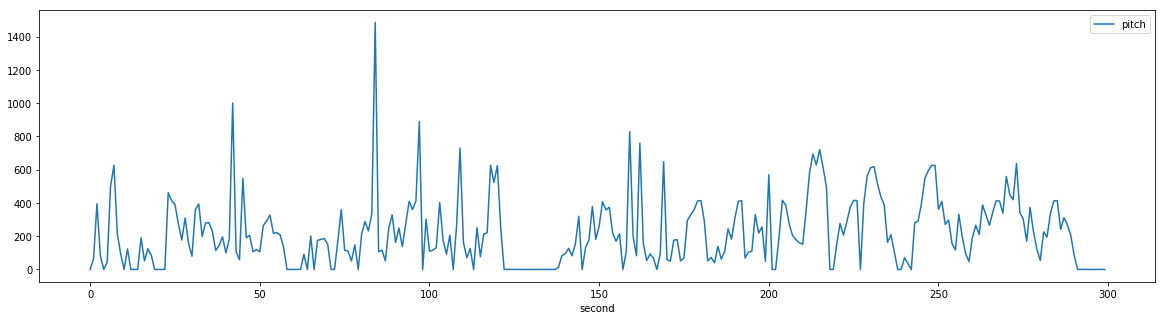

In [430]:
grouped_6.plot(figsize=(20,5))

In [431]:
grouped_6.shape

(300, 1)

In [432]:
grouped_6['note'] = grouped_6.pitch.apply(lambda x: pitch(x))
grouped_6.head(40)

,pitch,note
second,,
0,0.00000,None
1,64.65173,C2
2,394.91576,G4
3,81.73792,E2
4,0.00000,None
5,43.14576,F1
6,497.42021,B4
7,626.79226,D#5
8,213.30159,G#3


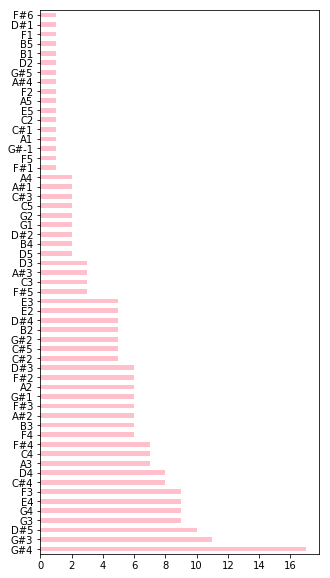

In [433]:
grouped_6.note.value_counts().plot(kind='barh', figsize=(5,10), color='pink')

In [434]:
grouped_6['scale'] = grouped_6['note'].apply({
    'None': 0, 
    'C0': 1, 'C1': 1, 'C2': 1,'C3': 1, 'C4': 1, 'C5': 1, 'C6': 1,
    'C#0': 2, 'C#1': 2, 'C#2': 2, 'C#3': 2, 'C#4': 2, 'C#5': 2, 'C#6': 2,
    'D0': 3, 'D1':3, 'D2':3, 'D3':3, 'D4':3, 'D5':3, 'D6':3, 
    'D#0':4, 'D#1':4, 'D#2':4, 'D#3':4, 'D#5':4, 'D#4':4, 'D#6':4,'D#-1':4,
    'E0': 5, 'E1': 5, 'E2': 5, 'E3': 5, 'E4': 5, 'E5': 5, 'E6': 5,
    'F0': 6, 'F1': 6, 'F2': 6, 'F3': 6, 'F4': 6, 'F5': 6, 'F6': 6, 'F#-1':6,
    'F#0': 7, 'F#1': 7, 'F#2': 7, 'F#3': 7, 'F#4': 7, 'F#5': 7, 'F#6': 7,
    'G0':8, 'G1':8, 'G2':8, 'G3':8, 'G4':8, 'G5':8, 'G6':8,
    'G#0':9, 'G#1':9, 'G#-1':9, 'G#2':9, 'G#3':9, 'G#4':9, 'G#5':9, 'G#6':9, 'G#-1': 9,
    'A0': 10, 'A1': 10, 'A2': 10, 'A3': 10, 'A4': 10, 'A5': 10, 'A6': 10,
    'A#0':11, 'A#1':11, 'A#2':11, 'A#3':11, 'A#4':11, 'A#5':11, 'A#6':11,
    'B0': 12, 'B1': 12, 'B2': 12, 'B3': 12, 'B4': 12, 'B5': 12, 'B6': 12,}.get)

In [435]:
grouped_6.head(30)

,pitch,note,scale
second,,,
0,0.00000,None,NaN
1,64.65173,C2,1.0
2,394.91576,G4,8.0
3,81.73792,E2,5.0
4,0.00000,None,NaN
5,43.14576,F1,6.0
6,497.42021,B4,12.0
7,626.79226,D#5,4.0
8,213.30159,G#3,9.0


In [436]:
grouped_6.fillna(0, inplace=True)
grouped_6.head()

,pitch,note,scale
second,,,
0,0.00000,0,0.0
1,64.65173,C2,1.0
2,394.91576,G4,8.0
3,81.73792,E2,5.0
4,0.00000,0,0.0


In [521]:
grouped_6['song_name'] = 'Don\'t Stop Me Now'
grouped_6.head()

,pitch,note,scale,song_name
second,,,,
0,0.00000,0,0.0,Don't Stop Me Now
1,64.65173,C2,1.0,Don't Stop Me Now
2,394.91576,G4,8.0,Don't Stop Me Now
3,81.73792,E2,5.0,Don't Stop Me Now
4,0.00000,0,0.0,Don't Stop Me Now


In [437]:
grouped_6.to_csv('dont-stop-me-now-notes.csv')

# I want to break free 

In [438]:
df_7 = pd.read_csv("i-want-to-break-free.tsv", sep=' ', header=None, names=['time', 'pitch'])
df_7.head()

,time,pitch
0,0.00000,0.00000
1,0.18576,0.00000
2,0.37152,237.93782
3,0.55728,240.29060
4,0.74304,331.73486


In [439]:
df_7['second'] = df_7.time.astype(int)
grouped_7 = df_7.groupby('second').pitch.mean().to_frame()
grouped_7.head()

,pitch
second,
0,191.56124
1,373.98548
2,129.20620
3,0.00000
4,46.72813


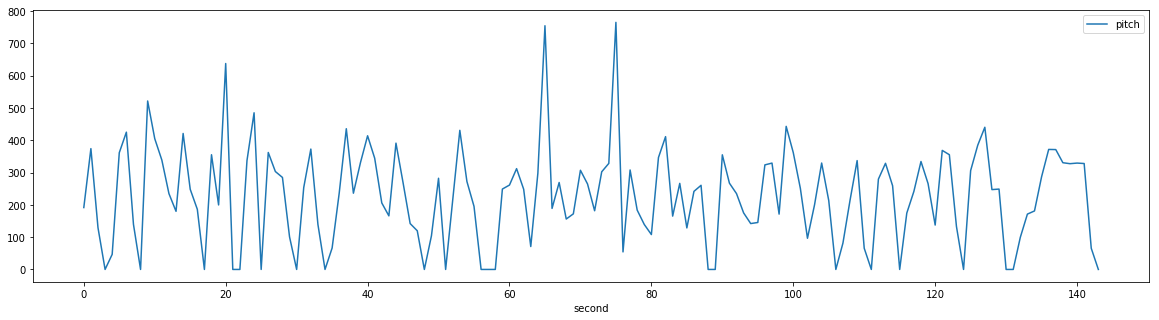

In [440]:
grouped_7.plot(figsize=(20,5))

In [441]:
grouped_7.shape

(144, 1)

In [442]:
grouped_7['note'] = grouped_7.pitch.apply(lambda x: pitch(x))
grouped_7.head(40)

,pitch,note
second,,
0,191.56124,G3
1,373.98548,F#4
2,129.20620,C3
3,0.00000,None
4,46.72813,F#1
5,361.30049,F#4
6,424.88845,G#4
7,139.59930,C#3
8,0.00000,None


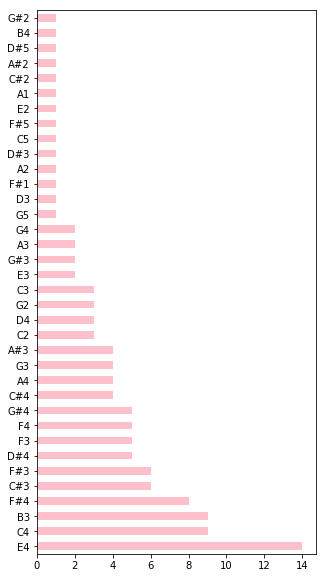

In [443]:
grouped_7.note.value_counts().plot(kind='barh', figsize=(5,10), color='pink')

In [444]:
grouped_7['scale'] = grouped_7['note'].apply({
    'None': 0, 
    'C0': 1, 'C1': 1, 'C2': 1,'C3': 1, 'C4': 1, 'C5': 1, 'C6': 1,
    'C#0': 2, 'C#1': 2, 'C#2': 2, 'C#3': 2, 'C#4': 2, 'C#5': 2, 'C#6': 2,
    'D0': 3, 'D1':3, 'D2':3, 'D3':3, 'D4':3, 'D5':3, 'D6':3, 
    'D#0':4, 'D#1':4, 'D#2':4, 'D#3':4, 'D#5':4, 'D#4':4, 'D#6':4,'D#-1':4,
    'E0': 5, 'E1': 5, 'E2': 5, 'E3': 5, 'E4': 5, 'E5': 5, 'E6': 5,
    'F0': 6, 'F1': 6, 'F2': 6, 'F3': 6, 'F4': 6, 'F5': 6, 'F6': 6, 'F#-1':6,
    'F#0': 7, 'F#1': 7, 'F#2': 7, 'F#3': 7, 'F#4': 7, 'F#5': 7, 'F#6': 7,
    'G0':8, 'G1':8, 'G2':8, 'G3':8, 'G4':8, 'G5':8, 'G6':8,
    'G#0':9, 'G#1':9, 'G#-1':9, 'G#2':9, 'G#3':9, 'G#4':9, 'G#5':9, 'G#6':9, 'G#-1': 9,
    'A0': 10, 'A1': 10, 'A2': 10, 'A3': 10, 'A4': 10, 'A5': 10, 'A6': 10,
    'A#0':11, 'A#1':11, 'A#2':11, 'A#3':11, 'A#4':11, 'A#5':11, 'A#6':11,
    'B0': 12, 'B1': 12, 'B2': 12, 'B3': 12, 'B4': 12, 'B5': 12, 'B6': 12,}.get)

In [445]:
grouped_7.head(30)

,pitch,note,scale
second,,,
0,191.56124,G3,8.0
1,373.98548,F#4,7.0
2,129.20620,C3,1.0
3,0.00000,None,NaN
4,46.72813,F#1,7.0
5,361.30049,F#4,7.0
6,424.88845,G#4,9.0
7,139.59930,C#3,2.0
8,0.00000,None,NaN


In [446]:
grouped_7.fillna(0, inplace=True)
grouped_7.head()

,pitch,note,scale
second,,,
0,191.56124,G3,8.0
1,373.98548,F#4,7.0
2,129.20620,C3,1.0
3,0.00000,0,0.0
4,46.72813,F#1,7.0


In [520]:
grouped_7['song_name'] = 'I Want To Break Free'
grouped_7.head()

,pitch,note,scale,song_name
second,,,,
0,191.56124,G3,8.0,I Want To Break Free
1,373.98548,F#4,7.0,I Want To Break Free
2,129.20620,C3,1.0,I Want To Break Free
3,0.00000,0,0.0,I Want To Break Free
4,46.72813,F#1,7.0,I Want To Break Free


In [447]:
grouped_7.to_csv('i-want-to-break-free-notes.csv')

# Radio Ga Ga 

In [448]:
df_8 = pd.read_csv("radio-ga-ga.tsv", sep=' ', header=None, names=['time', 'pitch'])
df_8.head()

,time,pitch
0,0.00000,0.00000
1,0.18576,0.00000
2,0.37152,0.00000
3,0.55728,116.15723
4,0.74304,0.00000


In [449]:
df_8['second'] = df_8.time.astype(int)
grouped_8 = df_8.groupby('second').pitch.mean().to_frame()
grouped_8.head()

,pitch
second,
0,38.77753
1,117.89905
2,202.42562
3,83.22260
4,17.43706


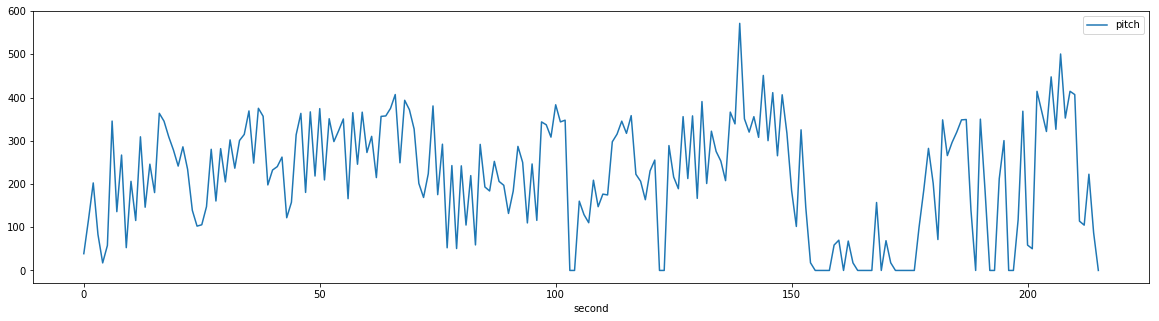

In [450]:
grouped_8.plot(figsize=(20,5))

In [451]:
grouped_8.shape

(216, 1)

In [452]:
grouped_8['note'] = grouped_8.pitch.apply(lambda x: pitch(x))
grouped_8.head(40)

,pitch,note
second,,
0,38.77753,D#1
1,117.89905,A#2
2,202.42562,G#3
3,83.22260,E2
4,17.43706,C#0
5,57.82454,A#1
6,345.53345,F4
7,135.96292,C#3
8,266.92856,C4


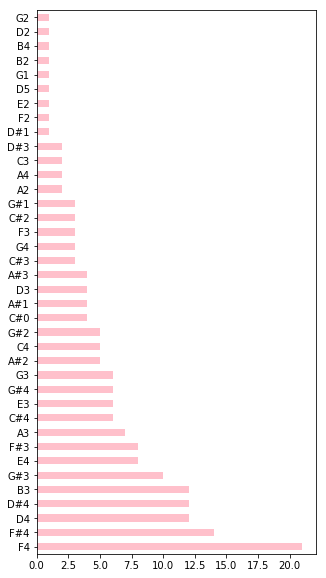

In [453]:
grouped_8.note.value_counts().plot(kind='barh', figsize=(5,10), color='pink')

In [454]:
grouped_8['scale'] = grouped_8['note'].apply({
    'None': 0, 
    'C0': 1, 'C1': 1, 'C2': 1,'C3': 1, 'C4': 1, 'C5': 1, 'C6': 1,
    'C#0': 2, 'C#1': 2, 'C#2': 2, 'C#3': 2, 'C#4': 2, 'C#5': 2, 'C#6': 2,
    'D0': 3, 'D1':3, 'D2':3, 'D3':3, 'D4':3, 'D5':3, 'D6':3, 
    'D#0':4, 'D#1':4, 'D#2':4, 'D#3':4, 'D#5':4, 'D#4':4, 'D#6':4,'D#-1':4,
    'E0': 5, 'E1': 5, 'E2': 5, 'E3': 5, 'E4': 5, 'E5': 5, 'E6': 5,
    'F0': 6, 'F1': 6, 'F2': 6, 'F3': 6, 'F4': 6, 'F5': 6, 'F6': 6, 'F#-1':6,
    'F#0': 7, 'F#1': 7, 'F#2': 7, 'F#3': 7, 'F#4': 7, 'F#5': 7, 'F#6': 7,
    'G0':8, 'G1':8, 'G2':8, 'G3':8, 'G4':8, 'G5':8, 'G6':8,
    'G#0':9, 'G#1':9, 'G#-1':9, 'G#2':9, 'G#3':9, 'G#4':9, 'G#5':9, 'G#6':9, 'G#-1': 9,
    'A0': 10, 'A1': 10, 'A2': 10, 'A3': 10, 'A4': 10, 'A5': 10, 'A6': 10,
    'A#0':11, 'A#1':11, 'A#2':11, 'A#3':11, 'A#4':11, 'A#5':11, 'A#6':11,
    'B0': 12, 'B1': 12, 'B2': 12, 'B3': 12, 'B4': 12, 'B5': 12, 'B6': 12,}.get)


In [455]:
grouped_8.head(50)

,pitch,note,scale
second,,,
0,38.77753,D#1,4.0
1,117.89905,A#2,11.0
2,202.42562,G#3,9.0
3,83.22260,E2,5.0
4,17.43706,C#0,2.0
5,57.82454,A#1,11.0
6,345.53345,F4,6.0
7,135.96292,C#3,2.0
8,266.92856,C4,1.0


In [456]:
grouped_8.fillna(0, inplace=True)
grouped_8.head()

,pitch,note,scale
second,,,
0,38.77753,D#1,4.0
1,117.89905,A#2,11.0
2,202.42562,G#3,9.0
3,83.22260,E2,5.0
4,17.43706,C#0,2.0


In [519]:
grouped_8['song_name'] = 'Radio Ga Ga'
grouped_8.head()

,pitch,note,scale,song_name
second,,,,
0,38.77753,D#1,4.0,Radio Ga Ga
1,117.89905,A#2,11.0,Radio Ga Ga
2,202.42562,G#3,9.0,Radio Ga Ga
3,83.22260,E2,5.0,Radio Ga Ga
4,17.43706,C#0,2.0,Radio Ga Ga


In [457]:
grouped_8.to_csv('radio-ga-ga-notes.csv')

# We are the champions

In [458]:
df_9 = pd.read_csv("we-are-the-champions.tsv", sep=' ', header=None, names=['time', 'pitch'])
df_9.head()

,time,pitch
0,0.00000,0.00000
1,0.18576,200.18657
2,0.37152,201.90837
3,0.55728,237.80139
4,0.74304,240.43636


In [459]:
df_9['second'] = df_9.time.astype(int)
grouped_9 = df_9.groupby('second').pitch.mean().to_frame()
grouped_9.head()

,pitch
second,
0,186.11526
1,260.62685
2,171.85165
3,0.00000
4,199.25052


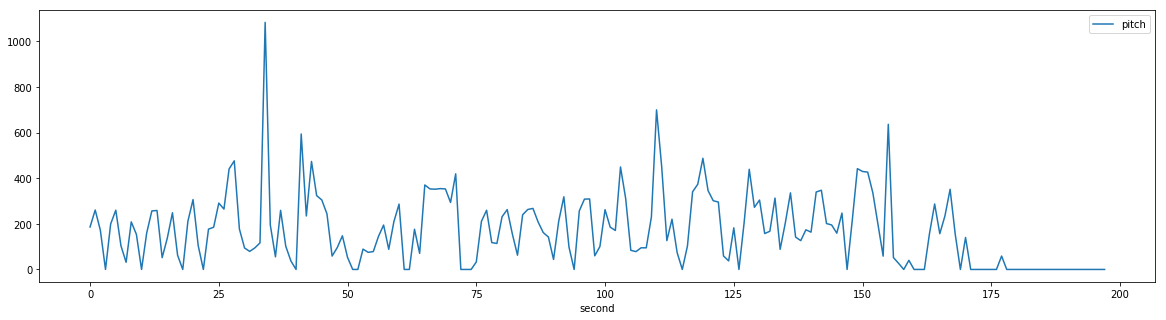

In [460]:
grouped_9.plot(figsize=(20,5))

In [461]:
grouped_9.shape

(198, 1)

In [462]:
grouped_9['note'] = grouped_9.pitch.apply(lambda x: pitch(x))
grouped_9.head(40)

,pitch,note
second,,
0,186.11526,F#3
1,260.62685,C4
2,171.85165,F3
3,0.00000,None
4,199.25052,G3
5,259.92647,C4
6,103.80870,G#2
7,31.43560,B0
8,208.55017,G#3


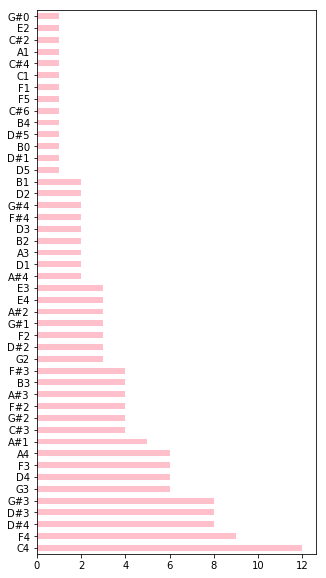

In [463]:
grouped_9.note.value_counts().plot(kind='barh', figsize=(5,10), color='pink')

In [464]:
grouped_9['scale'] = grouped_9['note'].apply({
    'None': 0, 
    'C0': 1, 'C1': 1, 'C2': 1,'C3': 1, 'C4': 1, 'C5': 1, 'C6': 1,
    'C#0': 2, 'C#1': 2, 'C#2': 2, 'C#3': 2, 'C#4': 2, 'C#5': 2, 'C#6': 2,
    'D0': 3, 'D1':3, 'D2':3, 'D3':3, 'D4':3, 'D5':3, 'D6':3, 
    'D#0':4, 'D#1':4, 'D#2':4, 'D#3':4, 'D#5':4, 'D#4':4, 'D#6':4,'D#-1':4,
    'E0': 5, 'E1': 5, 'E2': 5, 'E3': 5, 'E4': 5, 'E5': 5, 'E6': 5,
    'F0': 6, 'F1': 6, 'F2': 6, 'F3': 6, 'F4': 6, 'F5': 6, 'F6': 6, 'F#-1':6,
    'F#0': 7, 'F#1': 7, 'F#2': 7, 'F#3': 7, 'F#4': 7, 'F#5': 7, 'F#6': 7,
    'G0':8, 'G1':8, 'G2':8, 'G3':8, 'G4':8, 'G5':8, 'G6':8,
    'G#0':9, 'G#1':9, 'G#-1':9, 'G#2':9, 'G#3':9, 'G#4':9, 'G#5':9, 'G#6':9, 'G#-1': 9,
    'A0': 10, 'A1': 10, 'A2': 10, 'A3': 10, 'A4': 10, 'A5': 10, 'A6': 10,
    'A#0':11, 'A#1':11, 'A#2':11, 'A#3':11, 'A#4':11, 'A#5':11, 'A#6':11,
    'B0': 12, 'B1': 12, 'B2': 12, 'B3': 12, 'B4': 12, 'B5': 12, 'B6': 12,}.get)


In [465]:
grouped_9.head(30)

,pitch,note,scale
second,,,
0,186.11526,F#3,7.0
1,260.62685,C4,1.0
2,171.85165,F3,6.0
3,0.00000,None,NaN
4,199.25052,G3,8.0
5,259.92647,C4,1.0
6,103.80870,G#2,9.0
7,31.43560,B0,12.0
8,208.55017,G#3,9.0


In [466]:
grouped_9.fillna(0, inplace=True)
grouped_9.head()

,pitch,note,scale
second,,,
0,186.11526,F#3,7.0
1,260.62685,C4,1.0
2,171.85165,F3,6.0
3,0.00000,0,0.0
4,199.25052,G3,8.0


In [518]:
grouped_9['song_name'] = 'We Are The Champions'
grouped_9.head()

,pitch,note,scale,song_name
second,,,,
0,186.11526,F#3,7.0,We Are The Champions
1,260.62685,C4,1.0,We Are The Champions
2,171.85165,F3,6.0,We Are The Champions
3,0.00000,0,0.0,We Are The Champions
4,199.25052,G3,8.0,We Are The Champions


In [467]:
grouped_9.to_csv('we-are-the-champions-notes.csv')

# We will rock you

In [468]:
df_10 = pd.read_csv("we-will-rock-you.tsv", sep=' ', header=None, names=['time', 'pitch'])
df_10.head()

,time,pitch
0,0.00000,0.00000
1,0.18576,0.00000
2,0.37152,0.00000
3,0.55728,273.58484
4,0.74304,283.56738


In [469]:
df_10['second'] = df_10.time.astype(int)
grouped_10 = df_10.groupby('second').pitch.mean().to_frame()
grouped_10.head()


,pitch
second,
0,146.82929
1,379.64286
2,270.13879
3,602.96579
4,507.15973


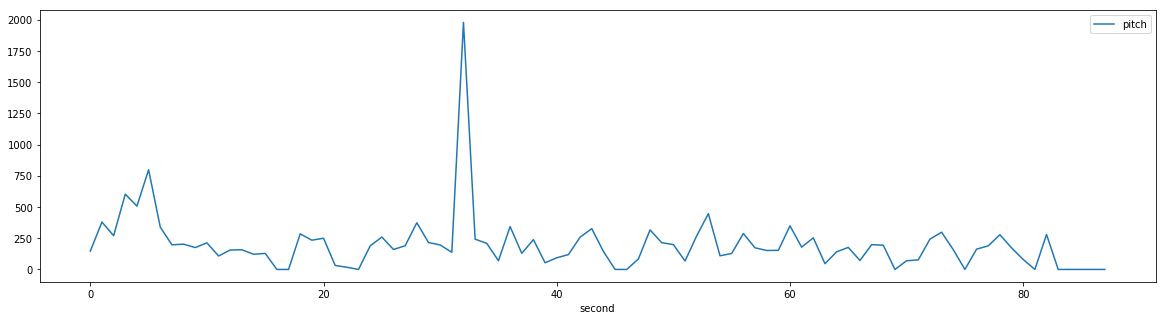

In [470]:
grouped_10.plot(figsize=(20,5))

In [471]:
grouped_10.shape

(88, 1)

In [472]:
grouped_10['note'] = grouped_10.pitch.apply(lambda x: pitch(x))
grouped_10.head(40)

,pitch,note
second,,
0,146.82929,D3
1,379.64286,F#4
2,270.13879,C#4
3,602.96579,D5
4,507.15973,B4
5,798.23084,G5
6,339.01291,E4
7,197.10448,G3
8,202.61075,G#3


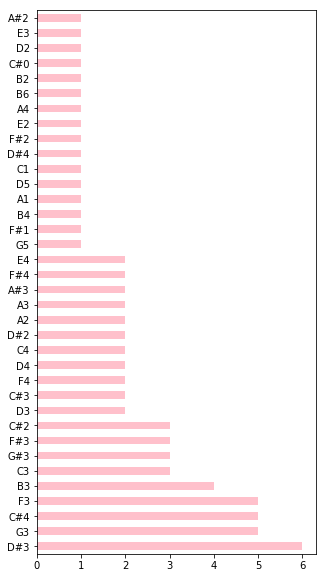

In [473]:
grouped_10.note.value_counts().plot(kind='barh', figsize=(5,10), color='pink')

In [475]:
grouped_10['scale'] = grouped_10['note'].apply({
    'None': 0, 
    'C0': 1, 'C1': 1, 'C2': 1,'C3': 1, 'C4': 1, 'C5': 1, 'C6': 1,
    'C#0': 2, 'C#1': 2, 'C#2': 2, 'C#3': 2, 'C#4': 2, 'C#5': 2, 'C#6': 2,
    'D0': 3, 'D1':3, 'D2':3, 'D3':3, 'D4':3, 'D5':3, 'D6':3, 
    'D#0':4, 'D#1':4, 'D#2':4, 'D#3':4, 'D#5':4, 'D#4':4, 'D#6':4,'D#-1':4,
    'E0': 5, 'E1': 5, 'E2': 5, 'E3': 5, 'E4': 5, 'E5': 5, 'E6': 5,
    'F0': 6, 'F1': 6, 'F2': 6, 'F3': 6, 'F4': 6, 'F5': 6, 'F6': 6, 'F#-1':6,
    'F#0': 7, 'F#1': 7, 'F#2': 7, 'F#3': 7, 'F#4': 7, 'F#5': 7, 'F#6': 7,
    'G0':8, 'G1':8, 'G2':8, 'G3':8, 'G4':8, 'G5':8, 'G6':8,
    'G#0':9, 'G#1':9, 'G#-1':9, 'G#2':9, 'G#3':9, 'G#4':9, 'G#5':9, 'G#6':9, 'G#-1': 9,
    'A0': 10, 'A1': 10, 'A2': 10, 'A3': 10, 'A4': 10, 'A5': 10, 'A6': 10,
    'A#0':11, 'A#1':11, 'A#2':11, 'A#3':11, 'A#4':11, 'A#5':11, 'A#6':11,
    'B0': 12, 'B1': 12, 'B2': 12, 'B3': 12, 'B4': 12, 'B5': 12, 'B6': 12,}.get)

In [476]:
grouped_10.head(30)

,pitch,note,scale
second,,,
0,146.82929,D3,3.0
1,379.64286,F#4,7.0
2,270.13879,C#4,2.0
3,602.96579,D5,3.0
4,507.15973,B4,12.0
5,798.23084,G5,8.0
6,339.01291,E4,5.0
7,197.10448,G3,8.0
8,202.61075,G#3,9.0


In [477]:
grouped_10.fillna(0, inplace=True)
grouped_10.head()

,pitch,note,scale
second,,,
0,146.82929,D3,3.0
1,379.64286,F#4,7.0
2,270.13879,C#4,2.0
3,602.96579,D5,3.0
4,507.15973,B4,12.0


In [517]:
grouped_10['song_name'] = 'We Will Rock You'
grouped_10.head()

,pitch,note,scale,song_name
second,,,,
0,146.82929,D3,3.0,We Will Rock You
1,379.64286,F#4,7.0,We Will Rock You
2,270.13879,C#4,2.0,We Will Rock You
3,602.96579,D5,3.0,We Will Rock You
4,507.15973,B4,12.0,We Will Rock You


In [478]:
grouped_10.to_csv('we-will-rock-you-notes-notes.csv')

# Combining all dataframes

In [527]:
df_final = pd.concat([grouped_1, grouped_2, grouped_3, grouped_4, grouped_5, grouped_6, grouped_7, grouped_8, grouped_9, grouped_10])
df_final.shape
df_final.head(50)
#df_final.to_csv('top-10-songs-notes.csv')